In [19]:
from model import SNUNet
from inference import inference_one_sample
from config import ModelConfig
import torch
import torch.optim as optim
from inference import inference_one_sample
from utils import show_images
import glob

### Load Pretrained Model

In [13]:
cfg = ModelConfig()

model = SNUNet(input_channels=9, norm_type=cfg.norm_type)

params = []
for name, values in model.named_parameters():
    if 'coding' not in name and 'bias' not in name and 'proj' not in name and 'norm' not in name and 'fc' not in name and 'sSE' not in name:
        params += [{'params': [values], 'lr': cfg.initial_lr, 'weight_decay': cfg.weight_decay}]
    else:
        params += [{'params': [values], 'lr': cfg.initial_lr, 'weight_decay': 0.0}]
optimizer = optim.Adam(params)

# load pretrained model
model.load(cfg.loadpath, optimizer)

if torch.cuda.is_available():
    model = model.cuda()
    device = torch.device('cuda')
    print("Device: CUDA\n")
else:
    device = torch.device('cpu')
    print("Device: CPU\n")
    
model.to(device)
_ = model.eval()

Trainable Parameters: 1.275M
Device: CPU



### Inference Examples

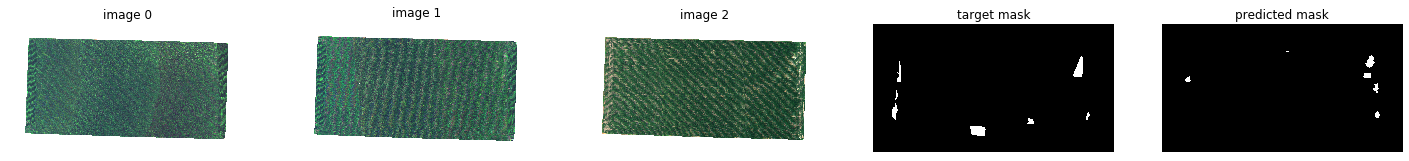

In [22]:
# load examples from validation dataset
data_folders = glob.glob('valid_data_examples/*')

# example 1
ind = 0
pred_mask = inference_one_sample(model, data_folders[ind], cfg, device)
show_images(data_folders[ind], pred_mask)

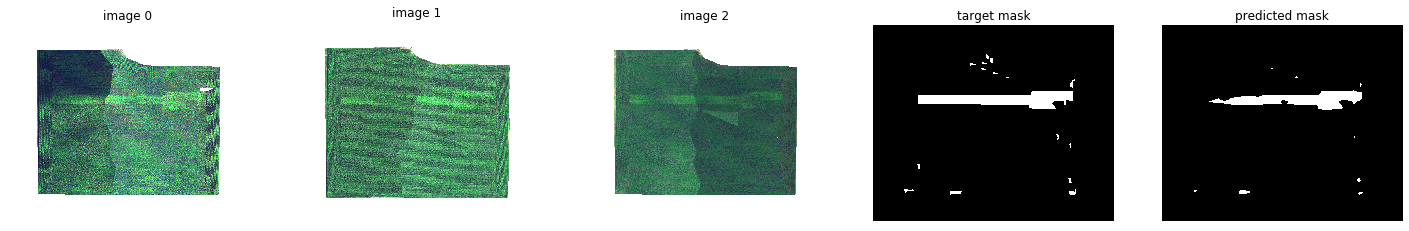

In [23]:
# example 2

ind = 1
pred_mask = inference_one_sample(model, data_folders[ind], cfg, device)
show_images(data_folders[ind], pred_mask)